In [ ]:
import pickle as pkl
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [ ]:
tr_data = pd.read_csv("/content/male_players (legacy).csv")
te_data = pd.read_csv("/content/players_22-1.csv")

<ipython-input-13-bbf313e516c2>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  tr_data = pd.read_csv("/content/male_players (legacy).csv")
<ipython-input-13-bbf313e516c2>:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  te_data = pd.read_csv("/content/players_22-1.csv")


# New Section

In [ ]:
Train_data = pd.DataFrame(tr_data)
Train_data.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [ ]:
Test_data = pd.DataFrame(te_data)
Test_data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
Train_data.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [ ]:
corr_mat= Train_data.corr(numeric_only=True)
corr_mat['overall'].sort_values(ascending=False)

overall                1.000000
movement_reactions     0.845753
potential              0.695362
mentality_composure    0.683307
passing                0.681114
                         ...   
club_jersey_number    -0.187109
league_level          -0.221734
nation_team_id        -0.338501
player_id             -0.368772
fifa_update                 NaN
Name: overall, Length: 63, dtype: float64

In [ ]:
Train_data.drop(['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_reflexes','goalkeeping_positioning','nation_jersey_number','nationality_id','club_jersey_number','club_team_id','league_level','nation_team_id', 'fifa_update','player_id'], axis=1, inplace=True)


In [ ]:
Train_data.drop(['club_name','league_name','club_position','club_loaned_from','nation_position','club_joined_date','club_contract_valid_until_year','player_tags','player_traits','real_face','player_positions', 'goalkeeping_speed', 'dob'], axis=1, inplace=True)

In [ ]:
Train_data_url = [col for col in Train_data.columns if col.endswith('_url')]
Train_data.drop(columns=Train_data_url, axis=1, inplace=True)

In [ ]:
Train_data.drop(Train_data.select_dtypes(include=['object']), axis=1, inplace=True)


In [ ]:
Test_data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
corr_matrix = Test_data.corr(numeric_only=True)
sorted_corr = corr_matrix['overall'].sort_values(ascending=False)

In [ ]:
Test_data.drop(['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_reflexes','goalkeeping_positioning','nation_jersey_number','nationality_id','club_jersey_number','club_team_id','league_level','nation_team_id', 'sofifa_id'], axis=1, inplace=True)


In [ ]:
Test_data.drop(['club_name','league_name','club_position','club_loaned_from','club_joined','club_contract_valid_until','nation_position','player_tags','player_traits','real_face','player_positions', 'goalkeeping_speed', 'dob'], axis=1, inplace=True)

In [ ]:
Test_data_url = [col for col in Test_data.columns if col.endswith('_url')]
Test_data.drop(columns=Test_data_url , axis=1, inplace=True)

In [ ]:
corr_matrix = Test_data.corr(numeric_only=True)
sorted_corr = corr_matrix['overall'].sort_values(ascending=False)

In [ ]:
dropped_cols = Train_data.select_dtypes(include=['object'])


In [ ]:
dropped_cols2 = Test_data.select_dtypes(include=['object'])


In [ ]:
Test_data.drop(Test_data.select_dtypes(include=['object']), axis=1, inplace=True)


In [ ]:

msv_training = Train_data.isnull().sum()
msv_testing = Test_data.isnull().sum()

msv_training, msv_testing


(fifa_version                       0
 overall                            0
 potential                          0
 value_eur                       2053
 wage_eur                        1761
 age                                0
 height_cm                          0
 weight_kg                          0
 league_id                       1773
 weak_foot                          0
 skill_moves                        0
 international_reputation           0
 release_clause_eur             57961
 pace                           17969
 shooting                       17969
 passing                        17969
 dribbling                      17969
 defending                      17969
 physic                         17969
 attacking_crossing                 0
 attacking_finishing                0
 attacking_heading_accuracy         0
 attacking_short_passing            0
 attacking_volleys                  0
 skill_dribbling                    0
 skill_curve                        0
 skill_fk_ac

In [ ]:
pip install matplotlib

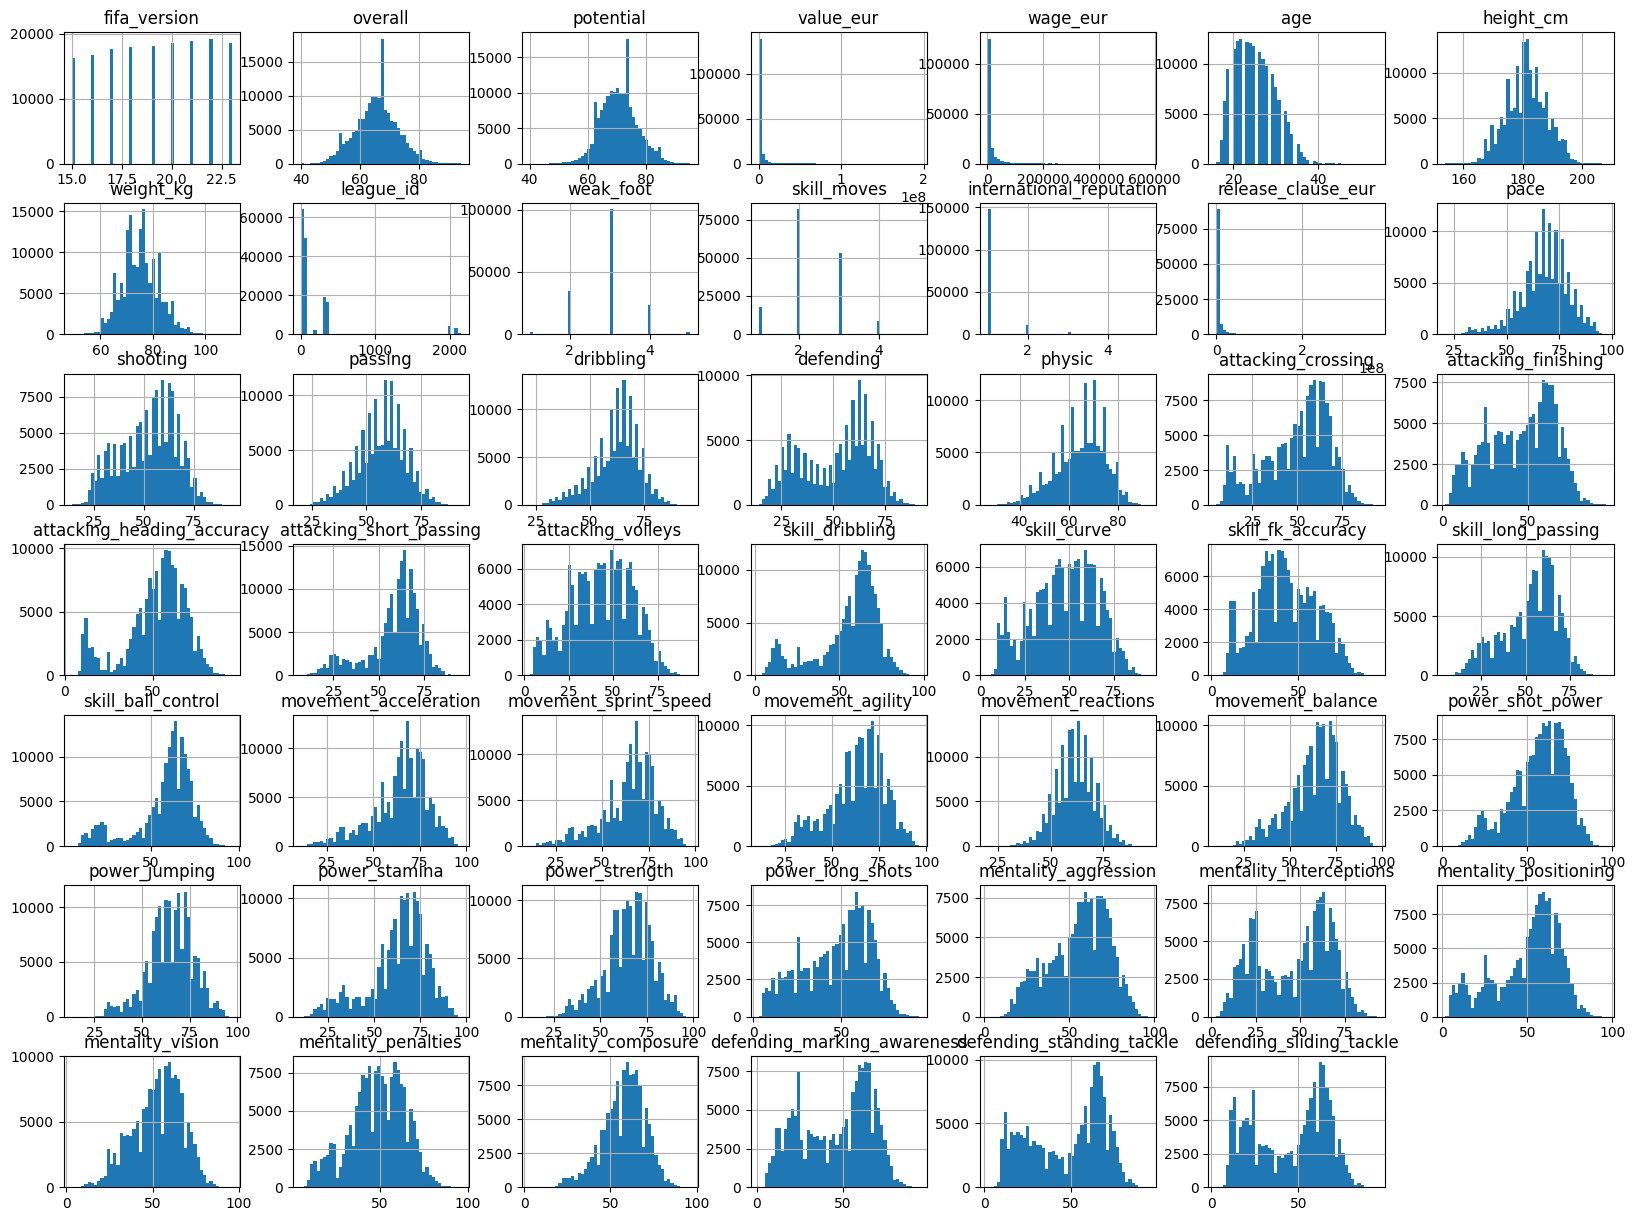

In [ ]:
#EDA
import matplotlib.pyplot as plt
Train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:

imp = SimpleImputer(strategy='mean')
imputed_data_training = imp.fit_transform(Train_data)
Train_data= pd.DataFrame(imputed_data_training , columns=Train_data.columns)
Train_data



,fifa_version,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_id,weak_foot,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,15.0,93.0,95.0,100500000.0,550000.0,27.0,169.0,67.0,53.0,3.0,...,88.0,48.0,22.0,92.0,90.0,76.0,57.816892,25.0,21.0,20.0
1,15.0,92.0,92.0,79000000.0,375000.0,29.0,185.0,80.0,53.0,4.0,...,93.0,63.0,24.0,91.0,81.0,85.0,57.816892,22.0,31.0,23.0
2,15.0,90.0,90.0,54500000.0,275000.0,30.0,180.0,80.0,19.0,2.0,...,90.0,47.0,39.0,89.0,84.0,80.0,57.816892,29.0,26.0,26.0
3,15.0,90.0,90.0,52500000.0,275000.0,32.0,195.0,95.0,16.0,4.0,...,88.0,84.0,20.0,86.0,83.0,91.0,57.816892,25.0,41.0,27.0
4,15.0,90.0,90.0,63500000.0,300000.0,28.0,193.0,92.0,19.0,4.0,...,25.0,29.0,30.0,25.0,20.0,37.0,57.816892,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,23.0,46.0,61.0,110000.0,700.0,18.0,180.0,73.0,2012.0,3.0,...,31.0,26.0,21.0,40.0,42.0,54.0,40.000000,23.0,21.0,25.0
161579,23.0,46.0,58.0,110000.0,750.0,19.0,188.0,83.0,2012.0,3.0,...,25.0,46.0,46.0,31.0,31.0,31.0,35.000000,50.0,51.0,45.0
161580,23.0,46.0,58.0,110000.0,500.0,19.0,181.0,73.0,65.0,2.0,...,32.0,51.0,43.0,53.0,40.0,37.0,35.000000,36.0,45.0,50.0
161581,23.0,46.0,70.0,150000.0,500.0,17.0,175.0,68.0,65.0,3.0,...,47.0,27.0,16.0,45.0,44.0,63.0,43.000000,19.0,17.0,14.0


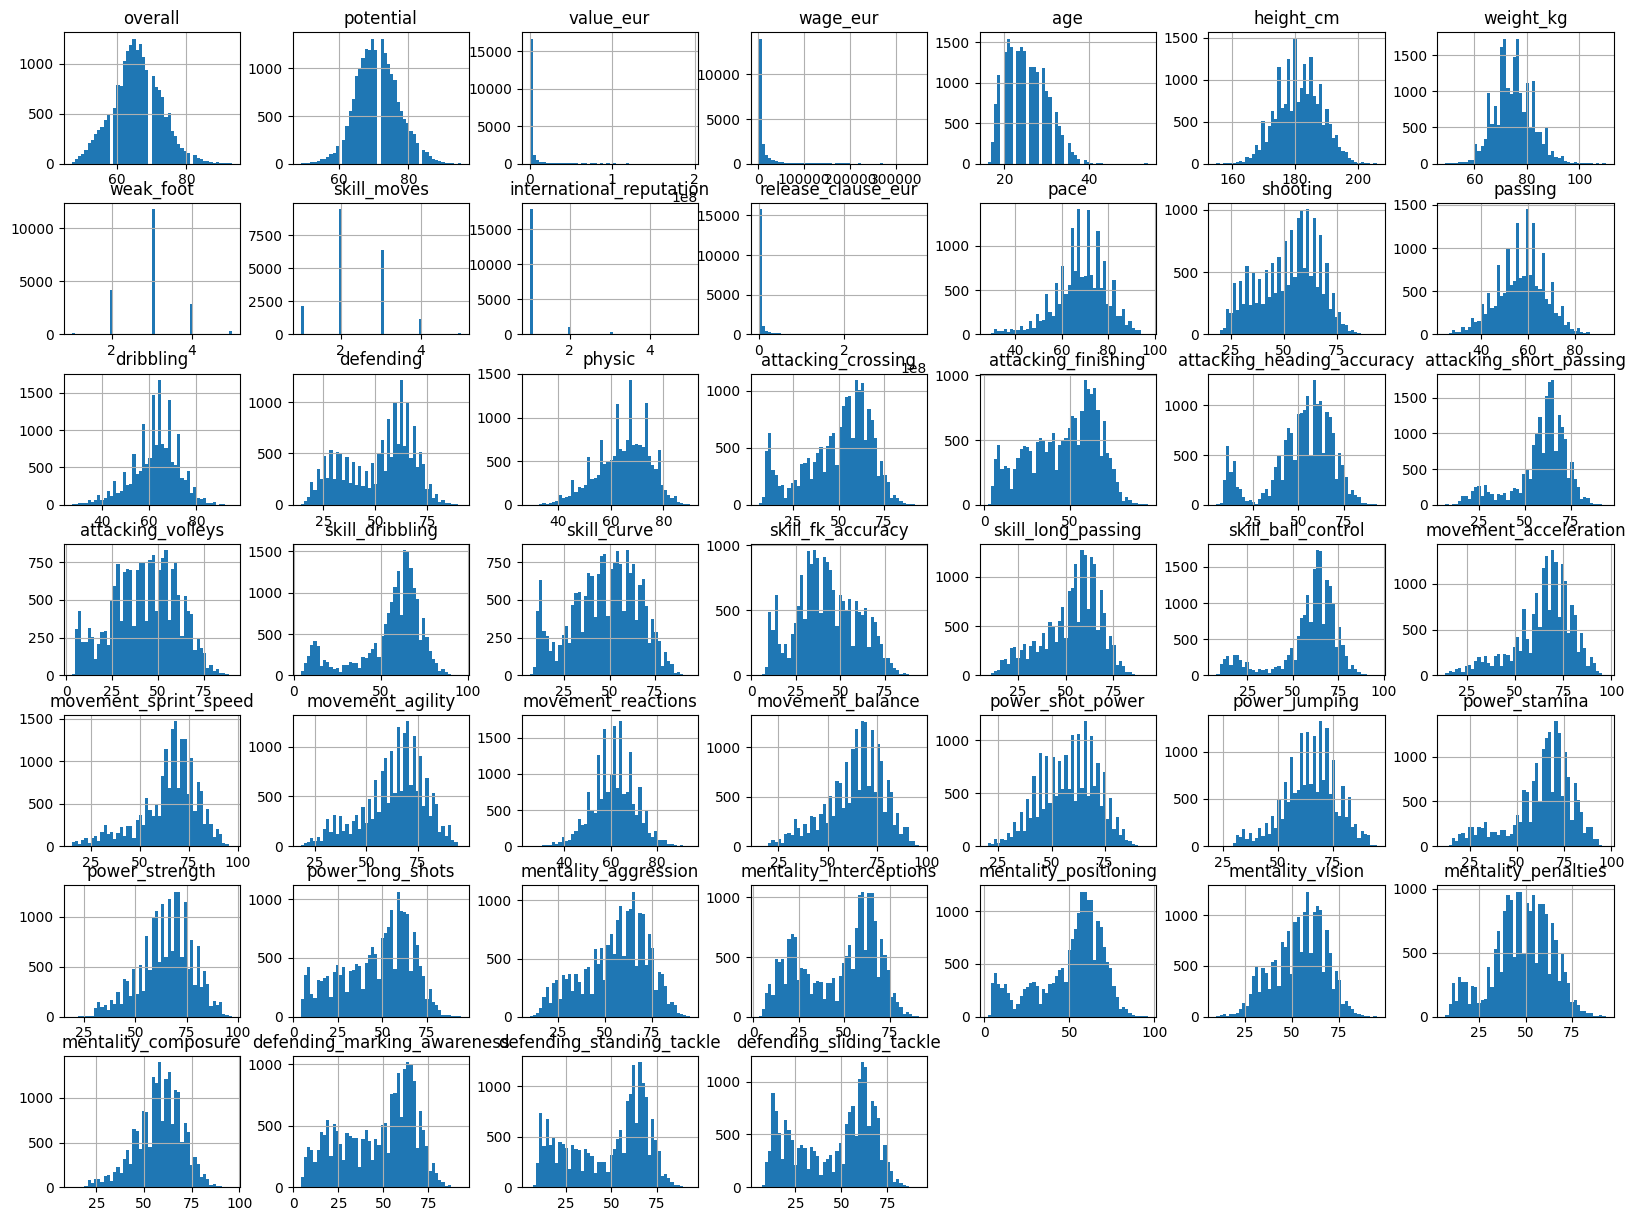

In [ ]:
Test_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
Train_data = pd.concat([dropped_cols, Train_data], axis=1)
Train_data

,fifa_update_date,short_name,long_name,nationality_name,preferred_foot,work_rate,body_type,ls,st,rs,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,Left,Medium/Low,Normal (170-),89+3,89+3,89+3,...,88.0,48.0,22.0,92.0,90.0,76.0,57.816892,25.0,21.0,20.0
1,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,Right,High/Low,Normal (185+),91+1,91+1,91+1,...,93.0,63.0,24.0,91.0,81.0,85.0,57.816892,22.0,31.0,23.0
2,2014-09-18,A. Robben,Arjen Robben,Netherlands,Left,High/Low,Normal (170-185),84+3,84+3,84+3,...,90.0,47.0,39.0,89.0,84.0,80.0,57.816892,29.0,26.0,26.0
3,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,Sweden,Right,Medium/Low,Normal (185+),87+3,87+3,87+3,...,88.0,84.0,20.0,86.0,83.0,91.0,57.816892,25.0,41.0,27.0
4,2014-09-18,M. Neuer,Manuel Peter Neuer,Germany,Right,Medium/Medium,Normal (185+),38+3,38+3,38+3,...,25.0,29.0,30.0,25.0,20.0,37.0,57.816892,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,2022-09-26,Zhao Ziye,赵梓业,China PR,Right,Medium/Medium,Lean (170-185),47+2,47+2,47+2,...,31.0,26.0,21.0,40.0,42.0,54.0,40.000000,23.0,21.0,25.0
161579,2022-09-26,Wu Junjie,吴俊杰,China PR,Left,Medium/Medium,Normal (185+),35+2,35+2,35+2,...,25.0,46.0,46.0,31.0,31.0,31.0,35.000000,50.0,51.0,45.0
161580,2022-09-26,K. Barlow,Kailin Barlow,Republic of Ireland,Right,High/Medium,Normal (170-185),46+2,46+2,46+2,...,32.0,51.0,43.0,53.0,40.0,37.0,35.000000,36.0,45.0,50.0
161581,2022-09-26,G. Tetteh,Gideon Tetteh,Republic of Ireland,Right,Medium/Medium,Normal (170-185),47+2,47+2,47+2,...,47.0,27.0,16.0,45.0,44.0,63.0,43.000000,19.0,17.0,14.0


In [ ]:
imp = SimpleImputer(strategy='mean')
imputed_data_testing= imp.fit_transform(Test_data)
Test_data= pd.DataFrame(imputed_data_testing, columns=Test_data.columns)


In [ ]:
Test_data= pd.concat([dropped_cols2, Test_data], axis=1)
Test_data

,short_name,long_name,nationality_name,preferred_foot,work_rate,body_type,ls,st,rs,lw,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,Left,Medium/Low,Unique,89+3,89+3,89+3,92,...,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0
1,R. Lewandowski,Robert Lewandowski,Poland,Right,High/Medium,Unique,90+2,90+2,90+2,85,...,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,Right,High/Low,Unique,90+1,90+1,90+1,88,...,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0
3,Neymar Jr,Neymar da Silva Santos Júnior,Brazil,Right,High/Medium,Unique,83+3,83+3,83+3,90,...,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0
4,K. De Bruyne,Kevin De Bruyne,Belgium,Right,High/High,Unique,83+3,83+3,83+3,88,...,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,China PR,Right,Medium/Medium,Lean (170-185),44+2,44+2,44+2,46,...,30.0,52.0,42.0,38.0,43.0,42.0,37.0,38.0,43.0,48.0
19235,C. Porter,Caoimhin Porter,Republic of Ireland,Right,Medium/Medium,Lean (170-185),45+2,45+2,45+2,47,...,38.0,49.0,39.0,51.0,49.0,44.0,47.0,37.0,44.0,47.0
19236,N. Logue,Nathan Logue-Cunningham,Republic of Ireland,Right,Medium/Medium,Lean (170-185),45+2,45+2,45+2,46,...,34.0,51.0,38.0,45.0,46.0,39.0,36.0,38.0,44.0,48.0
19237,L. Rudden,Luke Rudden,Republic of Ireland,Right,Medium/Medium,Lean (170-185),47+2,47+2,47+2,47,...,41.0,34.0,14.0,47.0,40.0,49.0,47.0,10.0,14.0,11.0


In [ ]:
def sum_values(value):
    if pd.isna(value):
        return 0
    else:
        parts = str(value).replace('-', '+').split('+')
        firstnum = int(parts[0])
        secondnum = int(parts[1]) if len(parts) > 1 else 0
        return  firstnum +  secondnum


In [ ]:
Object_col = Test_data.select_dtypes(include=['object']).drop(['short_name','long_name','nationality_name','preferred_foot','work_rate','body_type'], axis=1)



In [ ]:
Object_col2 = Train_data.select_dtypes(include=['object']).drop(['short_name','long_name','nationality_name','preferred_foot','work_rate','body_type'], axis=1)


In [ ]:
for columns in Object_col.columns:
    Object_col[columns] = Object_col[columns].astype(str)

Object_col

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89+3,89+3,89+3,92,93,93,93,92,93,93,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
19236,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
19237,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


In [ ]:
for columns in Object_col2.columns:
    Object_col2[columns] = Object_col2[columns].astype(str)



In [ ]:
for columns in Object_col.columns:
    Object_col[columns] = Object_col[columns].apply(sum_values)

Object_col

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,92,92,92,92,93,93,93,92,93,93,...,67,67,67,69,64,53,53,53,64,22
1,92,92,92,85,88,88,88,85,89,89,...,69,69,69,67,64,63,63,63,64,22
2,91,91,91,88,89,89,89,88,89,89,...,62,62,62,66,63,56,56,56,63,23
3,86,86,86,90,88,88,88,90,91,91,...,66,66,66,70,65,53,53,53,65,23
4,86,86,86,88,87,87,87,88,91,91,...,83,83,83,82,78,72,72,72,78,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,46,46,46,46,45,45,45,46,48,48,...,48,48,48,50,50,48,48,48,50,17
19235,47,47,47,47,46,46,46,47,49,49,...,48,48,48,51,50,46,46,46,50,16
19236,47,47,47,46,46,46,46,46,49,49,...,48,48,48,49,49,47,47,47,49,14
19237,49,49,49,47,47,47,47,47,47,47,...,31,31,31,35,34,28,28,28,34,17


In [ ]:
for columns in Object_col2.columns:
    Object_col2[columns] = Object_col2[columns].apply(sum_values)

Object_col2

,fifa_update_date,ls,st,rs,lw,lf,cf,rf,rw,lam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,2023,92,92,92,95,93,93,93,95,95,...,65,65,65,65,57,48,48,48,57,18
1,2023,92,92,92,92,92,92,92,92,92,...,66,66,66,66,60,55,55,55,60,19
2,2023,87,87,87,90,90,90,90,90,90,...,67,67,67,67,58,49,49,49,58,17
3,2023,90,90,90,87,89,89,89,87,89,...,68,68,68,64,59,58,58,58,59,20
4,2023,41,41,41,39,40,40,40,39,39,...,43,43,43,39,39,41,41,41,39,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,2031,49,49,49,46,46,46,46,46,46,...,34,34,34,39,38,33,33,33,38,16
161579,2031,37,37,37,34,33,33,33,34,34,...,43,43,43,45,46,50,50,50,46,17
161580,2031,48,48,48,46,46,46,46,46,47,...,47,47,47,49,49,48,48,48,49,16
161581,2031,49,49,49,46,46,46,46,46,47,...,32,32,32,36,34,30,30,30,34,17


In [ ]:
#label encoding
work_rat =  Train_data['work_rate']
pref_foot = Train_data['preferred_foot']
body_typ =  Train_data['body_type']

pref_foot_label_encoder = LabelEncoder()
pref_foot_encoded = pref_foot_label_encoder.fit_transform(pref_foot)
pref_foot = pd.Series(pref_foot_encoded, name='preferred_foot')

work_rat_label_encoder = LabelEncoder()
work_rat_encoded = work_rat_label_encoder.fit_transform(work_rat)
work_rat= pd.Series(work_rat_encoded, name='work_rate')

body_typ_label_encoder = LabelEncoder()
body_typ_encoded = body_typ_label_encoder.fit_transform(body_typ)
body_typ = pd.Series(body_typ_encoded, name='body_type')

Train_data.drop(['preferred_foot','work_rate','body_type', 'short_name', 'long_name','nationality_name',], axis=1, inplace=True)

Train_data = pd.concat([Train_data, body_typ, pref_foot, work_rat], axis=1)

In [ ]:
#label encoding
work_rat2 = Test_data['work_rate']
body_typ2 = Test_data['body_type']
pref_foot2 = Test_data['preferred_foot']


pref_foot2_label_encoder = LabelEncoder()
pref_foot2_encoded = pref_foot2_label_encoder.fit_transform(pref_foot2)
pref_foot2 = pd.Series(pref_foot2_encoded, name='preferred_foot')

work_rat2_label_encoder = LabelEncoder()
work_rat2_encoded = work_rat2_label_encoder.fit_transform(work_rat2)
work_rat2= pd.Series(work_rat2_encoded, name='work_rate')

body_typ2_label_encoder = LabelEncoder()
body_typ2_encoded = body_typ2_label_encoder.fit_transform(body_typ2)
body_typ2 = pd.Series(body_typ2_encoded, name='body_type')

Test_data.drop(['nationality_name','work_rate','body_type', 'short_name', 'long_name','preferred_foot'], axis=1, inplace=True)

Test_data= pd.concat([Test_data, body_typ2, pref_foot2, work_rat2], axis=1)

In [ ]:
corr1 = Train_data.corr(numeric_only=True)
corr1['overall'].sort_values(ascending=False)

overall                        1.000000
movement_reactions             0.845753
potential                      0.695362
passing                        0.632617
wage_eur                       0.608711
mentality_composure            0.604074
value_eur                      0.563962
dribbling                      0.563384
attacking_short_passing        0.499757
mentality_vision               0.493282
international_reputation       0.485234
skill_long_passing             0.483808
power_shot_power               0.480297
physic                         0.476732
release_clause_eur             0.461829
age                            0.458390
skill_ball_control             0.457011
shooting                       0.448143
skill_curve                    0.415863
power_long_shots               0.409086
mentality_aggression           0.398310
attacking_crossing             0.396833
skill_fk_accuracy              0.387269
attacking_volleys              0.377048
skill_dribbling                0.369827


In [ ]:
high_correlation_column = corr1['overall'].sort_values(ascending=False)[corr1['overall'] > 0.55].index.tolist()
important_col = [col for col in high_correlation_column  if col not in  Object_col.columns]


In [ ]:
print(len(important_col))

8


In [ ]:
corr2 = Test_data.corr(numeric_only=True)
corr2['overall'].sort_values(ascending=False)

overall                        1.000000
movement_reactions             0.871823
mentality_composure            0.708867
passing                        0.663519
potential                      0.644275
dribbling                      0.618419
wage_eur                       0.601001
power_shot_power               0.561180
value_eur                      0.553823
release_clause_eur             0.532528
mentality_vision               0.523025
attacking_short_passing        0.516788
skill_long_passing             0.498216
physic                         0.491127
international_reputation       0.470647
skill_ball_control             0.460411
age                            0.459451
shooting                       0.454368
skill_curve                    0.420423
power_long_shots               0.410010
attacking_crossing             0.401356
mentality_aggression           0.400161
power_stamina                  0.385150
skill_dribbling                0.384351
skill_fk_accuracy              0.381030


In [ ]:
high_correlation_column2 = corr2['overall'].sort_values(ascending=False)[corr2['overall'] > 0.55].index.tolist()
important_col2 = [col for col in high_correlation_column2 if col not in Object_col2.columns]


In [ ]:
print(len(important_col2))

9


In [ ]:

begin_col = Test_data[Test_data.columns[:8].tolist()]
Test_data = pd.concat([begin_col, Test_data], axis=1)

In [ ]:
begin_col2 = Train_data[Train_data.columns[:8].tolist()]
Train_data = pd.concat([begin_col2, Train_data], axis=1)

In [ ]:
Y_training = Train_data['overall']
X_training = Train_data[important_col]

In [ ]:
scaler_standard = StandardScaler()
scaler_standard.fit(Train_data[important_col])
training_features = scaler_standard.transform(Train_data[important_col])

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for training_index, testing_index in kf.split(X_training, Y_training):
    print(training_index, testing_index)
    Xtrain = pd.DataFrame(X_training, index=training_index)
    Xtest = pd.DataFrame(X_training, index=testing_index)
    Ytrain = pd.DataFrame(Y_training, index=training_index)
    Ytest = pd.DataFrame(Y_training, index=testing_index)

[     1      2      3 ... 161580 161581 161582] [     0      4     12 ... 161564 161571 161579]
[     0      1      2 ... 161579 161581 161582] [    22     23     31 ... 161573 161576 161580]
[     0      2      4 ... 161578 161579 161580] [     1      3      7 ... 161572 161581 161582]
[     0      1      3 ... 161580 161581 161582] [     2      6      9 ... 161562 161575 161577]
[     0      1      2 ... 161580 161581 161582] [     5     10     15 ... 161565 161574 161578]


In [ ]:
Xtrain=Xtrain.drop(columns=['overall'])

In [ ]:
Xtrain.columns

Index(['movement_reactions', 'potential', 'passing', 'wage_eur',
       'mentality_composure', 'value_eur', 'dribbling'],
      dtype='object')

In [ ]:
Xtest=Xtest.drop(columns=['overall'])

In [ ]:
Xtest.columns

Index(['movement_reactions', 'potential', 'passing', 'wage_eur',
       'mentality_composure', 'value_eur', 'dribbling'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    'rf': RandomForestRegressor(),
    'gb': GradientBoostingRegressor(),
    'dt': DecisionTreeRegressor()
}


In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.01)

# Fit the model
gb.fit(Xtrain, Ytrain.values.ravel())

# Predict on the test set
y_pred = gb.predict(Xtest)


In [ ]:
print(mean_absolute_error(Ytest, y_pred))
print(mean_squared_error(Ytest,y_pred))

2.7052717069991123
12.329059525759405


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
# Fit the model
dt.fit(Xtrain, Ytrain.values.ravel())

# Predict on the test set
y_pred = dt.predict(Xtest)

In [ ]:
print(mean_absolute_error(Ytest, y_pred))
print(mean_squared_error(Ytest,y_pred))

1.1619115402071214
4.060130172876181


In [ ]:
Ytest=Ytest.drop(columns=['overall'])
y_pred = dt.predict(Ytest)


In [ ]:

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10, criterion='absolute_error')

# Fit the model
rf.fit(Xtrain, Ytrain.values.ravel())

# Predict on the test set
y_pred = rf.predict(Xtest)

In [ ]:
print(mean_absolute_error(Ytest, y_pred))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Ytest,y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.01)

# Fit the model
gb.fit(Xtrain, Ytrain.values.ravel())

# Predict on the test set
y_pred = gb.predict(Xtest)


In [ ]:
print(mean_absolute_error(Ytest, y_pred))
print(mean_squared_error(Ytest,y_pred))

2.7052717069991123
12.329059525759405


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
# Fit the model
dt.fit(Xtrain, Ytrain.values.ravel())

# Predict on the test set
y_pred = dt.predict(Xtest)

In [ ]:
print(mean_absolute_error(Ytest, y_pred))
print(mean_squared_error(Ytest,y_pred))

In [ ]:
#cross-validation results
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, Xtrain, Ytrain, cv=5, scoring='neg_mean_absolute_error')
    results[model_name] = cv_scores

for model_name, cv_scores in results.items():
    print(f"{model_name} CV Mean MAE: {-np.mean(cv_scores):.4f} | Std: {np.std(cv_scores):.4f}")

In [ ]:
#Mean Absolute Error & Root Mean Squared Error
for model_name, model in models.items():
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtest)
    mae = mean_absolute_error(Ytest, y_pred)
    rmse = np.sqrt(mean_squared_error(Ytest, y_pred))
    print(f"{model_name} Test MAE: {mae:.4f} | Test RMSE: {rmse:.4f}")

In [ ]:
#determine the best model
model_metrics = {}
model_metrics[model_name] = (mae,rmse)
best_model_name = min(model_metrics, key = lambda k : model_metrics[k][0])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} | MAE: {model_metrics[best_model_name][0]:.4f} | RMSE: {model_metrics[best_model_name][1]:.4f}")

#save the best model to a file
with open('rf.pkl','wb') as f:
  pkl.dump(best_model , f)

In [ ]:
import joblib
joblib.dump(best_model, 'rf.pkl', compress = 9)

In [ ]:
model_1 = joblib.load('rf.pkl')

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(Test_data_url.drop('overall', axis = 1))

df_scaled = pd.DataFrame(scaled, columns = Test_data.drop('overall', axis = 1).columns)
df_scaled

subset = pd.concat([df_scaled, Test_data['overall'].reset_index(drop = True)], axis = 1)
subset.head()

In [ ]:
prediction_data = ['mentality_composure']
subset = Test_data.drop(columns=prediction_data, axis=1)
subset
prediction_data = model.predict(subset)
np.set_printoptions(threshold = np.inf)
prediction_data